# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! In this tutorial, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial to play with it yourself.


# Install detectron2

In [8]:
# install dependencies
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-db1bwz33
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-db1bwz33
  Resolved https://github.com/facebookresearch/fvcore.git to commit e8d19df2ffdaf0a78c8d88d6a2522c36b0cacb07
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-ltphcmen
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-ltphcmen
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.6-py3-none-any.whl size=65324 sha256=beda41a6bc284c1d4c7097dd1902994e689491f57310efae3bb6ba70a8197eba
  Stored in directory: /tmp/pip-ephem-wheel-cache-3kpsqv13/wheels/8f/cb/6a/3b7ac0e01781855ca3d1417ebf9e15e20d5b7fe37ab063aa50


'2.1.1+cu121'

In [9]:
#!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo
!pip install opencv-python

Obtaining file:///home/ec2-user/SageMaker/detectron2_repo
  Preparing metadata (setup.py) ... done
  Using cached pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached fvcore-0.1.5.post20221221-py3-none-any.whl
Using cached pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (426 kB)
  Attempting uninstall: fvcore
    Found existing installation: fvcore 0.1.6
    Uninstalling fvcore-0.1.6:
      Successfully uninstalled fvcore-0.1.6
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Uninstalling detectron2-0.6:
      Successfully uninstalled detectron2-0.6
  Running setup.py develop for detectron2


In [3]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
# import some common libraries
import numpy as np
import cv2
import random

# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from matplotlib import pyplot as plt

# Run a pre-trained detectron2 model

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [4]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
# import some common libraries
import numpy as np
import cv2
import random

# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from matplotlib import pyplot as plt

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cpu"
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
predictor = DefaultPredictor(cfg)

[12/14 08:42:26 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


In [2]:
image_cats_dogs = cv2.imread("./cats_and_dogs.jpg")
RGB_img = cv2.cvtColor(image_cats_dogs, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plt.imshow(RGB_img)
plt.show()

outputs2 = predictor(RGB_img)

v = Visualizer(image_cats_dogs[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs2["instances"].to("cpu"))
plt.figure(figsize=(15, 10))
plt.imshow(v.get_image()[:, :, ::-1])
plt.show()


image_new_york = cv2.imread("./new_york.jpg")
image_new_york_outputs = predictor(image_new_york)
image_new_york_outputs["instances"].pred_classes
image_new_york_outputs["instances"].pred_boxes
image_new_york_rgb = cv2.cvtColor(image_new_york, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plt.imshow(image_new_york_rgb)
plt.show()

v = Visualizer(image_new_york_rgb[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(image_new_york_outputs["instances"].to("cpu"))
plt.figure(figsize=(15, 10))
plt.imshow(v.get_image()[:, :, ::-1])
plt.show()

NameError: name 'plt' is not defined

In [12]:
!pip install pytube

from pytube import YouTube

def download_youtube_video(youtube_url, output_path='./'):
    yt = YouTube(youtube_url)
    video_stream = yt.streams.filter(file_extension='mp4').first()
    video_stream.download(output_path)
    return output_path

In [5]:
import time


def inference_on_video(video_path):
    # Load pre-trained Detectron 2 model

    

    # Open the video
    video_capture = cv2.VideoCapture(video_path)
    print('what???')

    while True:
        print('what?222??')
        # Read a frame from the video
        ret, frame = video_capture.read()

        print('what?2343422??')

        # Perform inference on the frame
        outputs = predictor(frame)

        
        # Visualize the results
 
        outputs2 = predictor(frame)

        v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
        v = v.draw_instance_predictions(outputs2["instances"].to("cpu"))
        plt.figure(figsize=(15, 10))
        plt.imshow(v.get_image()[:, :, ::-1])
        plt.show()

   

        time.sleep(1)
        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    # Release the video capture object and close the OpenCV window
    video_capture.release()
    cv2.destroyAllWindows()


In [6]:
youtube_url = 'https://www.youtube.com/shorts/SCglass2C5I'
video_path = download_youtube_video(youtube_url)


NameError: name 'download_youtube_video' is not defined

what???
what?222??
what?2343422??


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


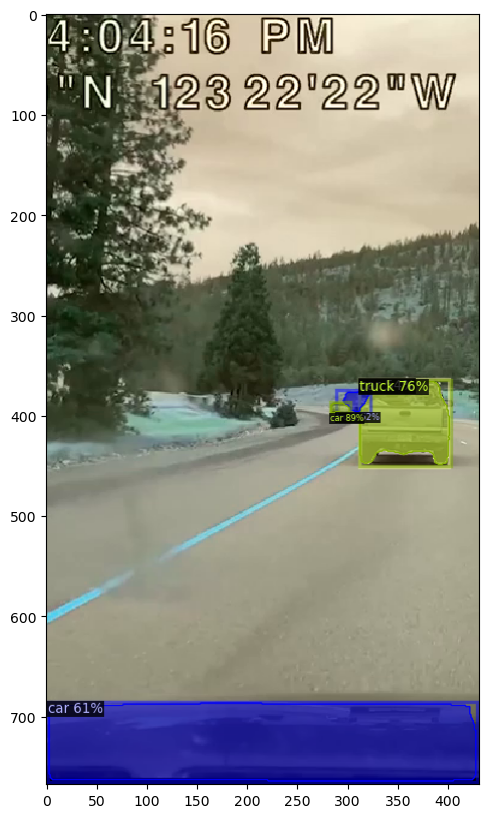

what?222??
what?2343422??


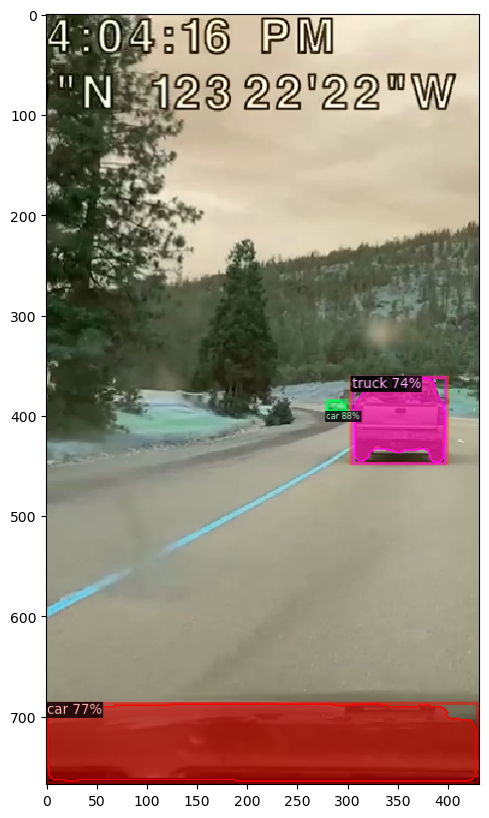

what?222??
what?2343422??


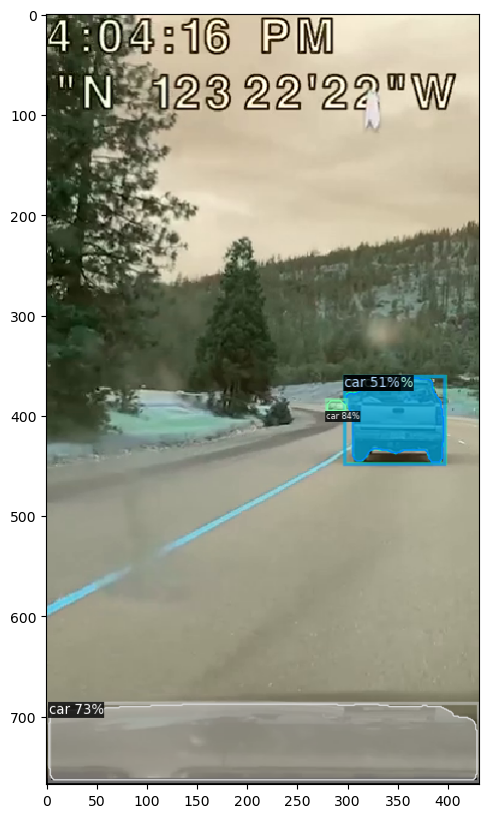

what?222??
what?2343422??


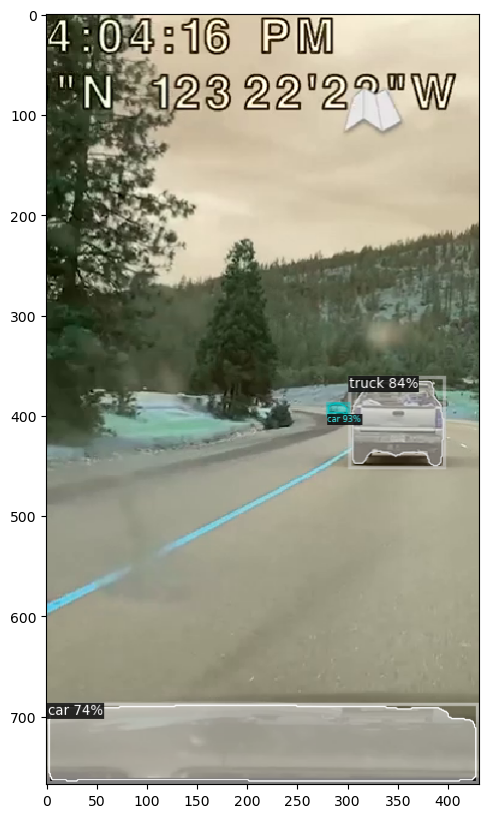

what?222??
what?2343422??


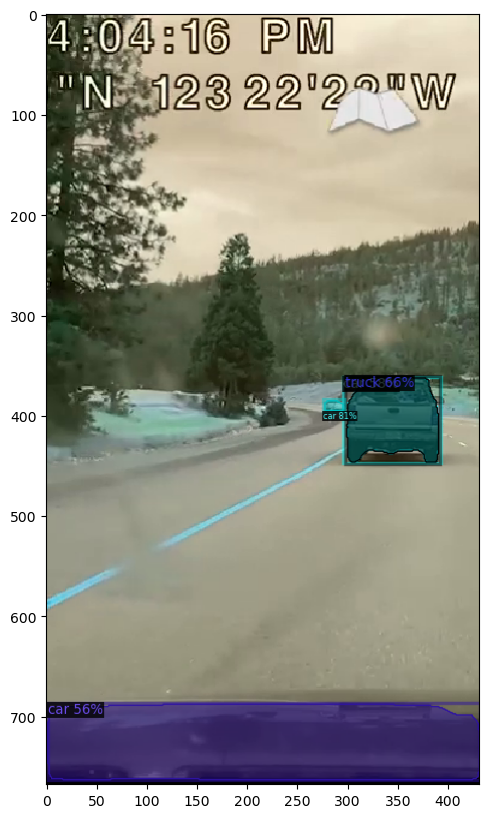

what?222??
what?2343422??


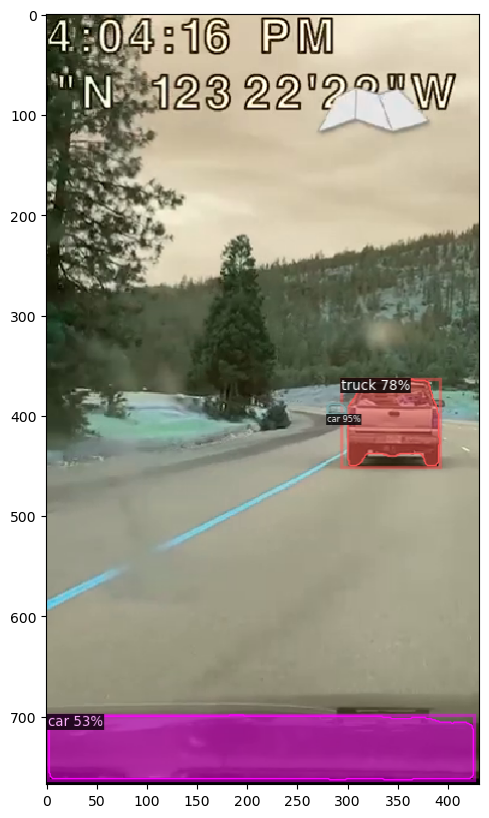

what?222??
what?2343422??


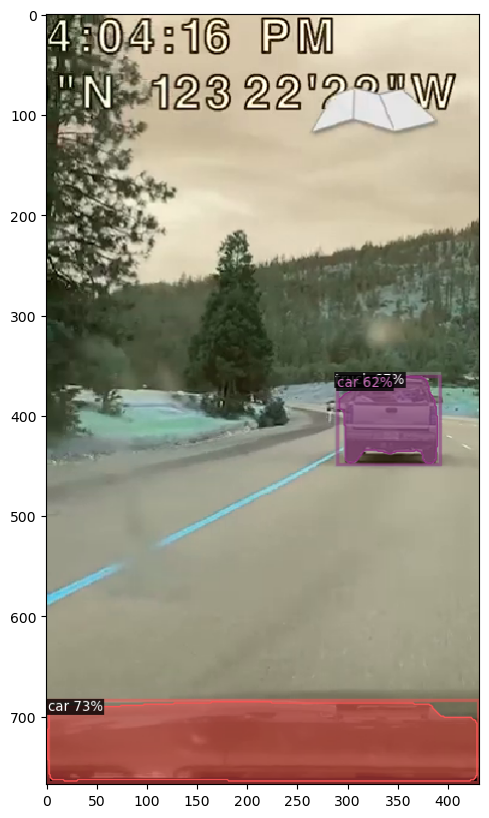

what?222??
what?2343422??


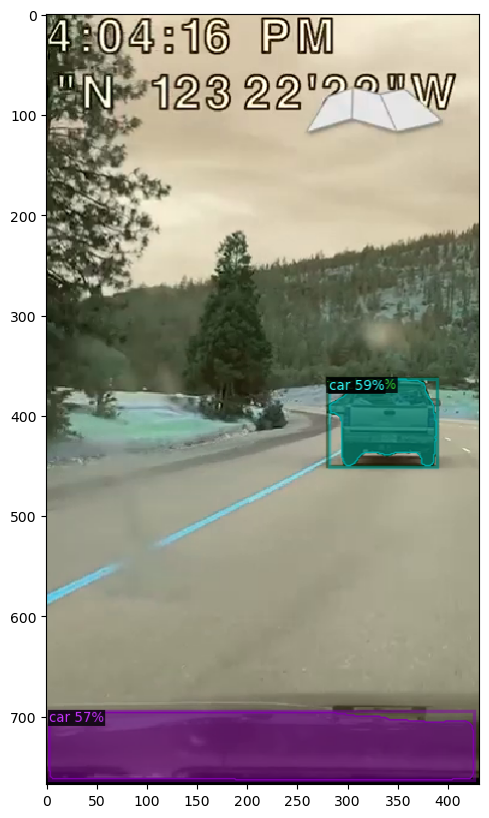

KeyboardInterrupt: 

In [12]:
import cv2 
inference_on_video('./EPIC DRIVING SKILLS CAUGHT ON DASH CAMERA.mp4')

In [34]:
import cv2
from detectron2.utils.visualizer import Visualizer

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.DEVICE = "cpu"
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
predictor = DefaultPredictor(cfg)

def inference_on_video(video_path, output_video_path='output_video.mp4'):
    # Open the video
    video_capture = cv2.VideoCapture(video_path)

    # Get video properties
    width = int(video_capture.get(3))
    height = int(video_capture.get(4))
    fps = int(video_capture.get(5))

    # Create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can change the codec as needed
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
    
        # Get class names from COCO metadata
    class_names = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes

    j = 1
    while j < 48:  # Adjust the number of frames for testing
        # Read a frame from the video
        ret, frame = video_capture.read()
        if not ret:
            break

        # Perform inference on the frame
        outputs = predictor(frame)

        # Get instances and their corresponding colors
        instances = outputs["instances"]
        instance_boxes = instances.pred_boxes.tensor.cpu().numpy()
        instance_scores = instances.scores.cpu().numpy()
        instance_classes = instances.pred_classes.cpu().numpy()
        instance_masks = instances.pred_masks.cpu().numpy()

        # Draw instance predictions on the frame
        for i in range(len(instance_scores)):
            box = instance_boxes[i]
            class_name = class_names[instance_classes[i]]

            score = instance_scores[i]

            # Convert to integers
            box = box.astype(int)

            # Draw bounding box on the frame
            frame = cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

                        # Add text annotation
            label = f"Class: {class_name}, Score: {score:.2f}"

            frame = cv2.putText(frame, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Write the frame with drawn bounding boxes to the output video
        out.write(frame)
        print(f"processing frame: {j}")
        j += 1

    video_capture.release()
    out.release()
    cv2.destroyAllWindows()
    print("finished!")


[12/14 09:22:40 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


In [35]:
inference_on_video('./input_video_from_youtube.mp4')

processing frame: 1
processing frame: 2
processing frame: 3
processing frame: 4
processing frame: 5
processing frame: 6
processing frame: 7
processing frame: 8
processing frame: 9
processing frame: 10
processing frame: 11
processing frame: 12
processing frame: 13
processing frame: 14
processing frame: 15
processing frame: 16
processing frame: 17
processing frame: 18
processing frame: 19
processing frame: 20
processing frame: 21
processing frame: 22
processing frame: 23
processing frame: 24
processing frame: 25
processing frame: 26
processing frame: 27
processing frame: 28
processing frame: 29
processing frame: 30
processing frame: 31
processing frame: 32
processing frame: 33
processing frame: 34
processing frame: 35
processing frame: 36
processing frame: 37
processing frame: 38
processing frame: 39
processing frame: 40
processing frame: 41
processing frame: 42
processing frame: 43
processing frame: 44
processing frame: 45
processing frame: 46
processing frame: 47
finished!


In [23]:
from IPython.display import HTML

# Replace 'path/to/your/video.mp4' with the actual path to your video file
video_path = './output_video.mp4'

# Display the video in the notebook using HTML
HTML(f'<video width="640" height="480" controls><source src="{video_path}" type="video/mp4"></video>')
